In [4]:
pip install jupyter

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install mediapipe opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import mediapipe as mp
import cv2
import numpy as np
import uuid #universal unique identifier generates random objrcts of IDs
import os

In [2]:
mp_drawing=mp.solutions.drawing_utils  #drawing of landmarks
mp_hands=mp.solutions.hands
mp_pose=mp.solutions.pose

In [3]:
#webcam fixing ...webcam feed
#while the video cam is connected extract frames and ret from the vision and name is 'hand tracking' .on pressing q this oeration is stopped and cam is realsed , windows odf cam destroyed
#take feed from webcam and overlay it to mediapipe
#set the tracking and detection percentage
cap=cv2.VideoCapture(0)
with mp_hands.Hands(min_detection_confidence=0.3,min_tracking_confidence=0.1) as hands:
    while cap.isOpened():
        ret,frame=cap.read()
    
    #recolor image from bgr to rgb as cv2 works with rgb
        image=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        
        #flip image to horizontal
        image=cv2.flip(image,1)
    
    #set the flag
        image.flags.writeable = True

        #detection
        results=hands.process(image)

        #set the flag
        image.flags.writeable = False

        #rgb to bgr
        image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

        print(results)
        
        #rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image,hand,mp_hands.HAND_CONNECTIONS) #select the bgr values 121,22,76
                    

        cv2.imshow("HandTracking",image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    
cap.release()
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [4]:
# LEFT AND RIGHT HAND DETECTION 
mp_hands.HandLandmark.WRIST


<HandLandmark.WRIST: 0>

In [6]:
results.multi_hand_landmarks[0]

landmark {
  x: 0.7404917478561401
  y: 0.8573914766311646
  z: 6.995489343353256e-07
}
landmark {
  x: 0.6524848341941833
  y: 0.8040276765823364
  z: -0.037033528089523315
}
landmark {
  x: 0.5795053243637085
  y: 0.7239322662353516
  z: -0.05832706019282341
}
landmark {
  x: 0.5219035148620605
  y: 0.6610314249992371
  z: -0.07782115787267685
}
landmark {
  x: 0.4744523763656616
  y: 0.6114131808280945
  z: -0.09680556505918503
}
landmark {
  x: 0.6509159803390503
  y: 0.5481196641921997
  z: -0.02369171939790249
}
landmark {
  x: 0.6318511962890625
  y: 0.4302022457122803
  z: -0.04938902333378792
}
landmark {
  x: 0.6248481869697571
  y: 0.3553309142589569
  z: -0.07322746515274048
}
landmark {
  x: 0.6226082444190979
  y: 0.2897396683692932
  z: -0.09168333560228348
}
landmark {
  x: 0.7066164016723633
  y: 0.5324413180351257
  z: -0.02904590032994747
}
landmark {
  x: 0.7037583589553833
  y: 0.3987582325935364
  z: -0.049963969737291336
}
landmark {
  x: 0.7022704482078552
  y: 

In [7]:
results.multi_handedness[0].classification[0].index == num

False

In [8]:
round(results.multi_handedness[0].classification[0].score, 2)

0.96

In [9]:
#LEFT AND RIGHT LABEL
def get_label(index, hand, results):
    output = None
    for idx, classification in enumerate(results.multi_handedness):
        if classification.classification[0].index == index:
            
            # Process results
            label = classification.classification[0].label
            score = classification.classification[0].score
            text = '{} {}'.format(label, round(score, 2))
            
            # Extract Coordinates
            coords = tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.WRIST].x, hand.landmark[mp_hands.HandLandmark.WRIST].y)),
            [640,480]).astype(int))
            
            output = text, coords
            
    return output


In [11]:
get_label(num, hand, results)

In [12]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                
                # Render left or right detection
                if get_label(num, hand, results):
                    text, coord = get_label(num, hand, results)
                    cv2.putText(image, text, coord, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
#ANGLE DETECTION
from matplotlib import pyplot as plt


In [14]:
joint_list = [[1,0,5],[6,5,9],[10,9,13],[14,13,17]]


In [15]:
joint_list[1]

[6, 5, 9]

In [16]:
def draw_finger_angles(image, results, joint_list):
    
    # Loop through hands
    for hand in results.multi_hand_landmarks:
        #Loop through joint sets 
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
                
            cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    return image


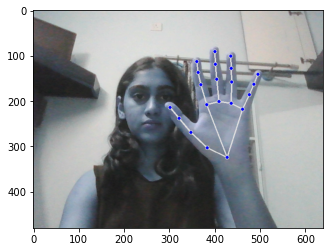

In [17]:
plt.imshow(image)
#image without angle detection

In [18]:
test_image=draw_finger_angles(image, results, joint_list)

In [19]:
test_image

array([[[165, 170, 173],
        [165, 169, 173],
        [164, 168, 173],
        ...,
        [160, 161, 164],
        [156, 159, 161],
        [151, 155, 156]],

       [[164, 170, 173],
        [164, 170, 173],
        [164, 169, 174],
        ...,
        [161, 162, 165],
        [157, 160, 162],
        [153, 157, 158]],

       [[159, 170, 172],
        [159, 169, 172],
        [160, 170, 174],
        ...,
        [161, 163, 167],
        [158, 162, 164],
        [155, 160, 162]],

       ...,

       [[142, 144, 144],
        [144, 148, 147],
        [139, 145, 144],
        ...,
        [178, 183, 185],
        [179, 184, 186],
        [179, 184, 185]],

       [[137, 145, 144],
        [139, 149, 147],
        [136, 146, 144],
        ...,
        [180, 183, 185],
        [180, 184, 186],
        [181, 185, 186]],

       [[133, 145, 143],
        [136, 148, 146],
        [132, 145, 143],
        ...,
        [182, 184, 186],
        [180, 183, 185],
        [179, 182, 183]]

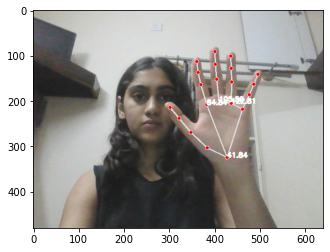

In [20]:
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()


In [21]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                
                # Render left or right detection
                if get_label(num, hand, results):
                    text, coord = get_label(num, hand, results)
                    #cv2.putText(image, text, coord, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list)
            
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()